<a href="https://colab.research.google.com/github/cml096/Basic-Project/blob/master/Rendimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [20]:
list_drop = ['ID','shiftindex','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [21]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

In [22]:
df_loads = df[(df.unit == 'Camion') | (df.unit == 'Pala')]

#Rendimiento Efectivo

\begin{equation}
\mathrm{Rendimiento_{(efectivo)}}[tps] = \frac{Tonelaje}{Segundos Efectivas del Equipo}
\end{equation}

In [38]:
def rendimiento_efectivo(ton,time):
  if time == 0:
    return 0
  else:
    if ton/time > 100:
      print(f'toneladas = {ton} ; tiempo efectivo = {time} ; Rendimiento : {ton/time}')
    return ton/time

In [39]:
df_loads.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07',
       'performans'],
      dtype='object')

In [40]:
df_loads['rendimiento_efectivo'] = df_loads.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01),axis=1)

toneladas = 2300 ; tiempo efectivo = 2 ; Rendimiento : 1150.0
toneladas = 1380 ; tiempo efectivo = 10 ; Rendimiento : 138.0
toneladas = 1840 ; tiempo efectivo = 3 ; Rendimiento : 613.3333333333334
toneladas = 920 ; tiempo efectivo = 5 ; Rendimiento : 184.0
toneladas = 7590 ; tiempo efectivo = 38 ; Rendimiento : 199.73684210526315
toneladas = 2070 ; tiempo efectivo = 8 ; Rendimiento : 258.75
toneladas = 4140 ; tiempo efectivo = 7 ; Rendimiento : 591.4285714285714
toneladas = 230 ; tiempo efectivo = 1 ; Rendimiento : 230.0
toneladas = 690 ; tiempo efectivo = 5 ; Rendimiento : 138.0
toneladas = 2034 ; tiempo efectivo = 8 ; Rendimiento : 254.25
toneladas = 2486 ; tiempo efectivo = 6 ; Rendimiento : 414.3333333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df_loads[['totaltons','tmcat01','rendimiento_efectivo']].describe()

,totaltons,tmcat01,performans
count,82583.000000,82583.000000,82583.000000
mean,1507.564172,7369.720790,0.157085
std,3601.060553,12324.977788,5.577645
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1823.500000,10971.000000,0.115559
max,50616.000000,65079.000000,1150.000000


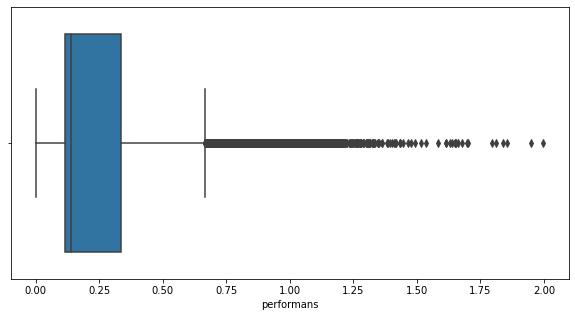

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_loads.rendimiento_efectivo[ (df_loads.rendimiento_efectivo != 0) & (df_loads.rendimiento_efectivo < 2) ])

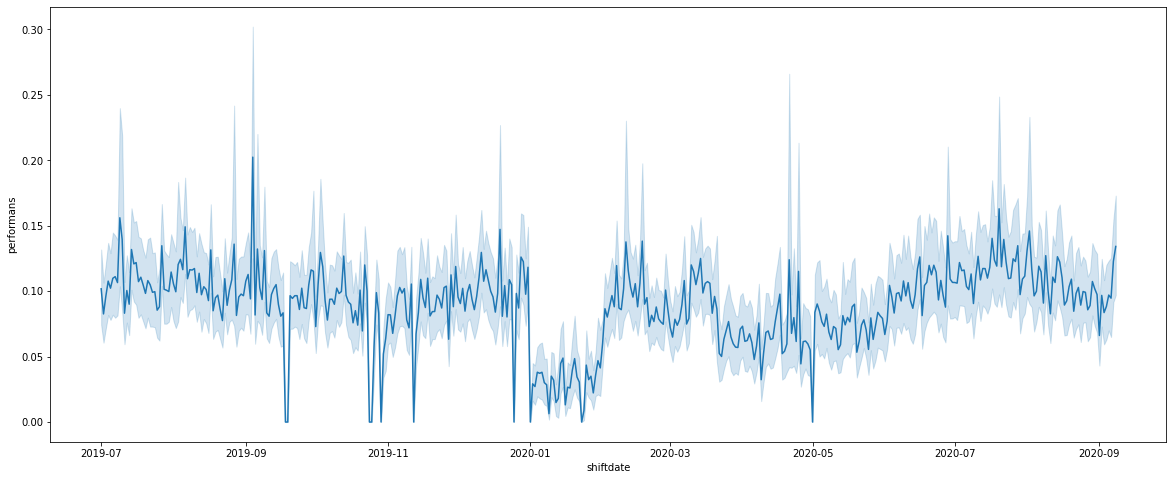

In [46]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="rendimiento_efectivo",data=df_loads[df_loads.rendimiento_efectivo < 10])

# Rendimiento Operativo

\begin{equation}
\mathrm{Tiempo_{(operativo)}} = \mathrm{Tiempo_{(efectivo)}} + \mathrm{Tiempo_{(no productivo)}}
\end{equation}

In [51]:
def tiempo_operativo(time_1,time_2):
  return time_1+time_2

\begin{equation}
\mathrm{Rendimiento_{(operativo)}}[tps] = \frac{Tonelaje}{Segundos Operativos del Equipo}
\end{equation}

In [62]:
def rendimiento_efectivo(ton,time_1,time_2):
  time = tiempo_operativo(time_1,time_2)
  if time == 0:
    return 0
  else:
    if ton/time > 100:
      print(f'toneladas = {ton} ; tiempo operativo = {time} ; Rendimiento : {ton/time}')
    return ton/time

In [63]:
df_loads['rendimiento_operativo'] = df_loads.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01,row.tmcat02),axis=1)

toneladas = 2300 ; tiempo operativo = 2 ; Rendimiento : 1150.0
toneladas = 1380 ; tiempo operativo = 10 ; Rendimiento : 138.0
toneladas = 1840 ; tiempo operativo = 3 ; Rendimiento : 613.3333333333334
toneladas = 920 ; tiempo operativo = 5 ; Rendimiento : 184.0
toneladas = 7590 ; tiempo operativo = 38 ; Rendimiento : 199.73684210526315
toneladas = 2070 ; tiempo operativo = 8 ; Rendimiento : 258.75
toneladas = 4140 ; tiempo operativo = 7 ; Rendimiento : 591.4285714285714
toneladas = 230 ; tiempo operativo = 1 ; Rendimiento : 230.0
toneladas = 690 ; tiempo operativo = 5 ; Rendimiento : 138.0
toneladas = 2034 ; tiempo operativo = 8 ; Rendimiento : 254.25
toneladas = 2486 ; tiempo operativo = 6 ; Rendimiento : 414.3333333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df_loads[['totaltons','tmcat01','tmcat02','rendimiento_operativo']].describe()

,totaltons,tmcat01,tmcat02,rendimiento_operativo
count,82583.000000,82583.000000,82583.000000,82583.000000
mean,1507.564172,7369.720790,0.263468,0.157082
std,3601.060553,12324.977788,48.451121,5.577644
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1823.500000,10971.000000,0.000000,0.115559
max,50616.000000,65079.000000,10796.000000,1150.000000


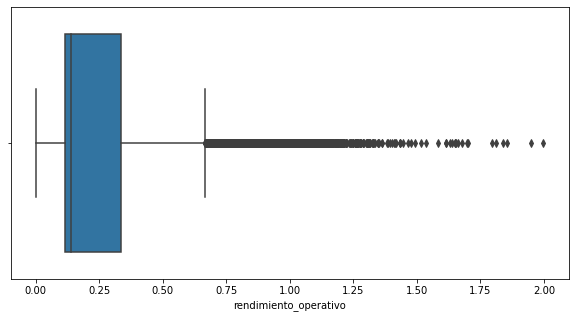

In [68]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_loads.rendimiento_operativo[ (df_loads.rendimiento_operativo != 0) & (df_loads.rendimiento_operativo < 2) ])

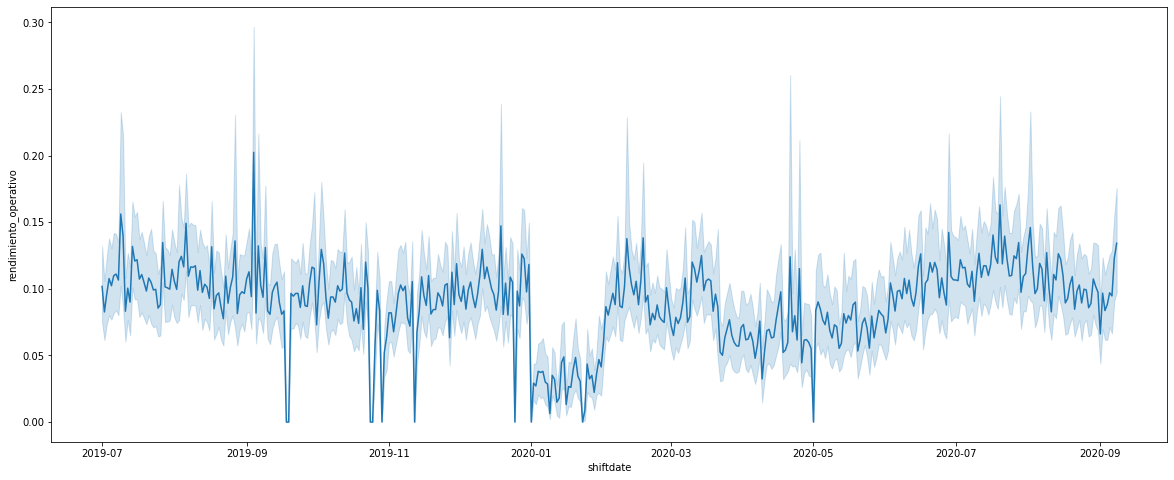

In [71]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="rendimiento_operativo",data=df_loads[df_loads.rendimiento_operativo < 10])